In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [163]:
df = pd.read_csv('CO2_emission_data.csv')
df.head()

,Region,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
0,Europe,4294,151,1976,5.652325e+09,0.010,3033659
1,Europe,4166,151,2172,7.464447e+09,0.024,3014579
2,Europe,4254,151,2172,8.376484e+09,0.060,2992724
3,Europe,3865,151,2068,9.132562e+09,0.096,2968028
4,Europe,4056,151,2025,1.070101e+10,0.150,2940880


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            1243 non-null   object 
 1   CO2 Emissions     1243 non-null   int64  
 2   Ease of Business  1243 non-null   int64  
 3   Energy Usage      1243 non-null   int64  
 4   GDP               1243 non-null   float64
 5   Internet Usage    1236 non-null   float64
 6   Population Total  1243 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 68.1+ KB


## 1. Exploratory Data Analysis

### 1. Identify the different regions to which the countries belong and visualize the count of countries.

In [165]:
df['Region'].value_counts()

Region
Europe          302
The Americas    289
Africa          254
Asia            244
Middle East      92
Oceania          62
Name: count, dtype: int64

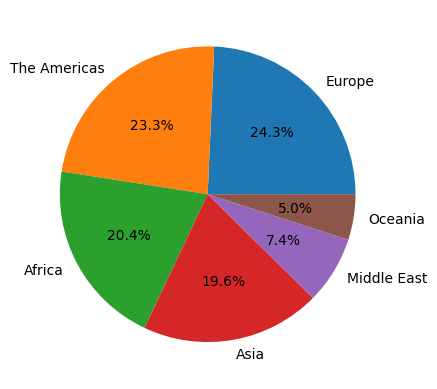

In [166]:
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index, autopct='%.1f%%')
plt.show()

### 2. Check the datatype, dimension and summary statistics of the data.

In [167]:
df.dtypes

Region               object
CO2 Emissions         int64
Ease of Business      int64
Energy Usage          int64
GDP                 float64
Internet Usage      float64
Population Total      int64
dtype: object

In [168]:
df.shape

(1243, 7)

In [169]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2 Emissions,1243.0,1.897666e+05,7.697027e+05,48.0,3.111500e+03,1.620800e+04,7.581200e+04,8.286892e+06
Ease of Business,1243.0,8.827997e+01,5.277039e+01,1.0,4.500000e+01,8.500000e+01,1.310000e+02,1.860000e+02
Energy Usage,1243.0,7.541842e+04,2.707586e+05,30.0,2.721000e+03,9.318000e+03,3.495650e+04,2.727728e+06
GDP,1243.0,3.535548e+11,1.358970e+12,123258507.0,7.746581e+09,2.468037e+10,1.770000e+11,1.620000e+13
Internet Usage,1236.0,3.299830e-01,1.634042e+00,0.0,6.200000e-02,2.005000e-01,4.600000e-01,5.700000e+01
Population Total,1243.0,4.513494e+07,1.600483e+08,69660.0,2.097088e+06,7.739900e+06,2.884664e+07,1.350695e+09


### 3. Drop the variables 'Region', 'Ease of Business', 'Internet Usage'.

In [170]:
df.drop(columns=['Region', 'Ease of Business', 'Internet Usage'], inplace=True)

### 4. Check if there are missing values, if yes then remove the observations with missing values.

In [171]:
df.isna().sum()

CO2 Emissions       0
Energy Usage        0
GDP                 0
Population Total    0
dtype: int64

### 5. Check if there are outliers in the data and visualize the outliers using a boxplot. 

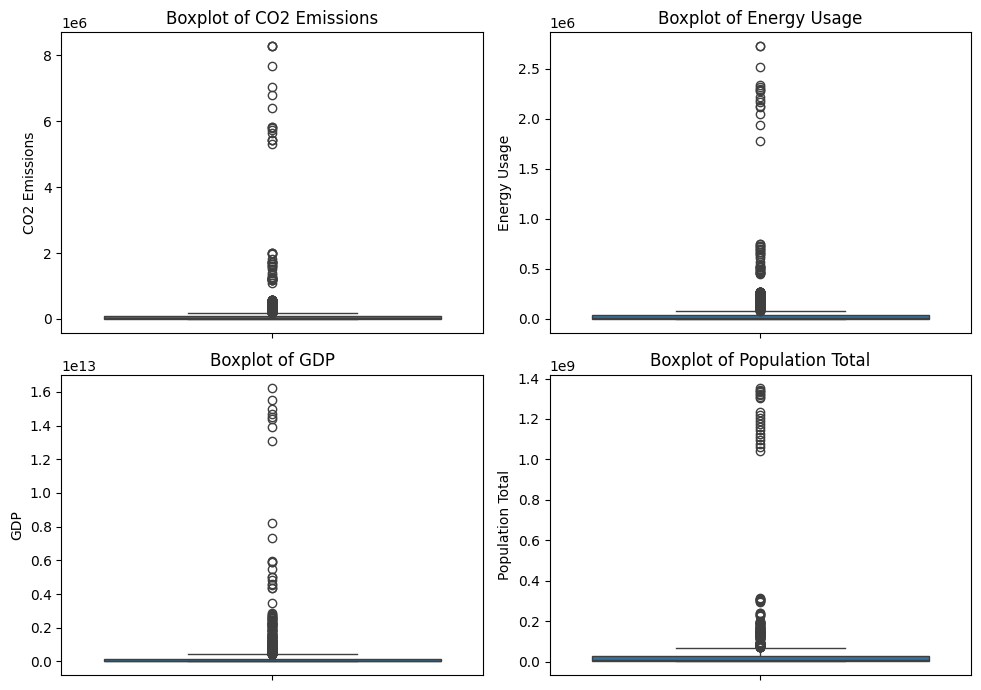

In [172]:
fig, axes = plt.subplots(2,2, figsize=(10,7))
axes = axes.ravel()

for i,j in enumerate(df.columns):
    sns.boxplot(df, y=j, ax=axes[i])
    axes[i].set_title(f"Boxplot of {j}")

plt.tight_layout()
plt.show()

### 6. Remove the outliers using 3.5IQR and check the shape of the data.

In [173]:
def detect_outliers(col):
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lr, ur = Q1 - 3.5*IQR, Q3 + 3.5*IQR

    return lr, ur

In [174]:
df.shape

(1243, 4)

In [175]:
for i in df.columns:
    for j in range(len(df)):
        if (df[i].loc[j] < detect_outliers(df[i])[0]) or (df[i].loc[j] > detect_outliers(df[i])[1]):
            df.drop(j, axis=0, inplace=True)
    df.reset_index(drop=True, inplace=True)

In [176]:
df.shape

(876, 4)

### 7. Visualize the data obtained after removing the outliers with the help of a boxplot.

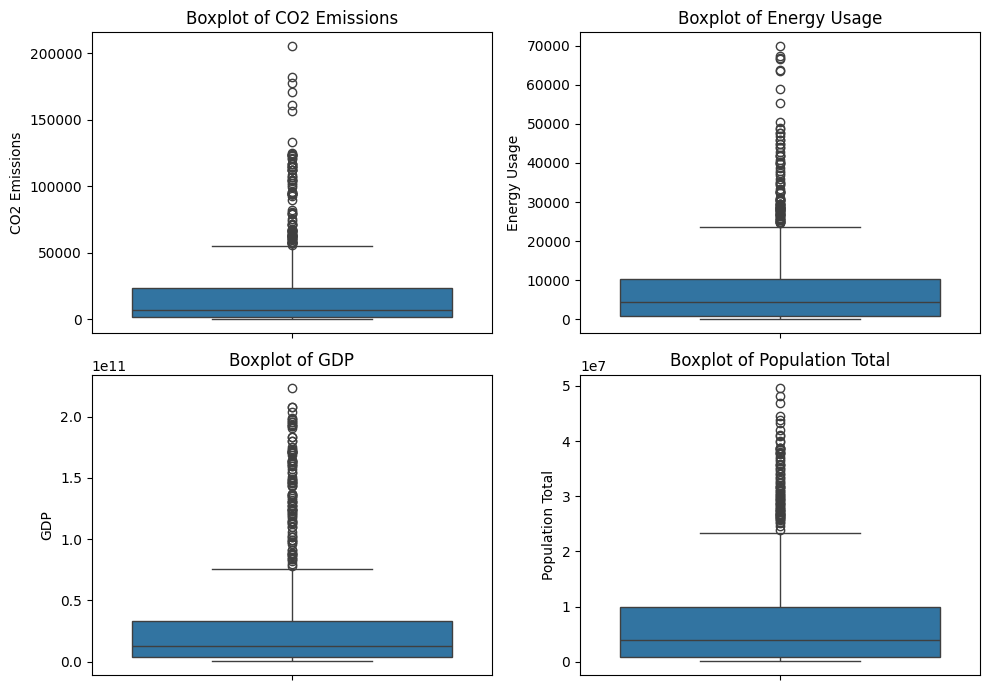

In [177]:
fig, axes = plt.subplots(2,2, figsize=(10,7))
axes = axes.ravel()

for i,j in enumerate(df.columns):
    sns.boxplot(df, y=j, ax=axes[i])
    axes[i].set_title(f"Boxplot of {j}")

plt.tight_layout()
plt.show()

### 8. Transform the variables in the standard form such that they will have mean 0 and standard deviation 1 and get the summary.

In [178]:
df = df.apply(zscore)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2 Emissions,876.0,1.216683e-17,1.000571,-0.659143,-0.605382,-0.435097,0.117745,6.220606
Energy Usage,876.0,4.055609e-17,1.000571,-0.764200,-0.689578,-0.378495,0.149969,5.406727
GDP,876.0,2.838926e-17,1.000571,-0.680810,-0.596369,-0.396400,0.059175,4.279811
Population Total,876.0,-4.055609e-17,1.000571,-0.790903,-0.710992,-0.397509,0.230816,4.299191


## 2. Hierarchical Clustering

### 9. Use the 'ward' linkage method and print the first 10 observations of the linkage matrix.

In [179]:
Z = linkage(df, method='ward')

In [180]:
# The first row of the linkage matrix contains [i, j, d, k], 
# it means that clusters with indices i and j were merged with a distance or similarity measure of d, 
# resulting in a new cluster containing k data points.
Z

array([[3.28000000e+02, 3.30000000e+02, 5.79005895e-05, 2.00000000e+00],
       [3.39000000e+02, 3.40000000e+02, 9.52423795e-05, 2.00000000e+00],
       [3.60000000e+01, 3.70000000e+01, 2.11889479e-04, 2.00000000e+00],
       ...,
       [1.74400000e+03, 1.74700000e+03, 2.35949178e+01, 2.28000000e+02],
       [1.74600000e+03, 1.74800000e+03, 3.81131864e+01, 2.87000000e+02],
       [1.74500000e+03, 1.74900000e+03, 5.64433526e+01, 8.76000000e+02]])

In [181]:
Z[:10]

array([[3.28000000e+02, 3.30000000e+02, 5.79005895e-05, 2.00000000e+00],
       [3.39000000e+02, 3.40000000e+02, 9.52423795e-05, 2.00000000e+00],
       [3.60000000e+01, 3.70000000e+01, 2.11889479e-04, 2.00000000e+00],
       [3.29000000e+02, 3.31000000e+02, 2.23118074e-04, 2.00000000e+00],
       [4.15000000e+02, 4.16000000e+02, 2.38018972e-04, 2.00000000e+00],
       [2.60000000e+01, 2.70000000e+01, 2.49356686e-04, 2.00000000e+00],
       [3.32000000e+02, 3.33000000e+02, 2.52685520e-04, 2.00000000e+00],
       [6.93000000e+02, 6.95000000e+02, 2.66969018e-04, 2.00000000e+00],
       [3.37000000e+02, 3.38000000e+02, 3.15260865e-04, 2.00000000e+00],
       [6.92000000e+02, 6.94000000e+02, 3.39649396e-04, 2.00000000e+00]])

### 10. Visualize the clusters obtained using dendrogram and find the optimal number of clusters.

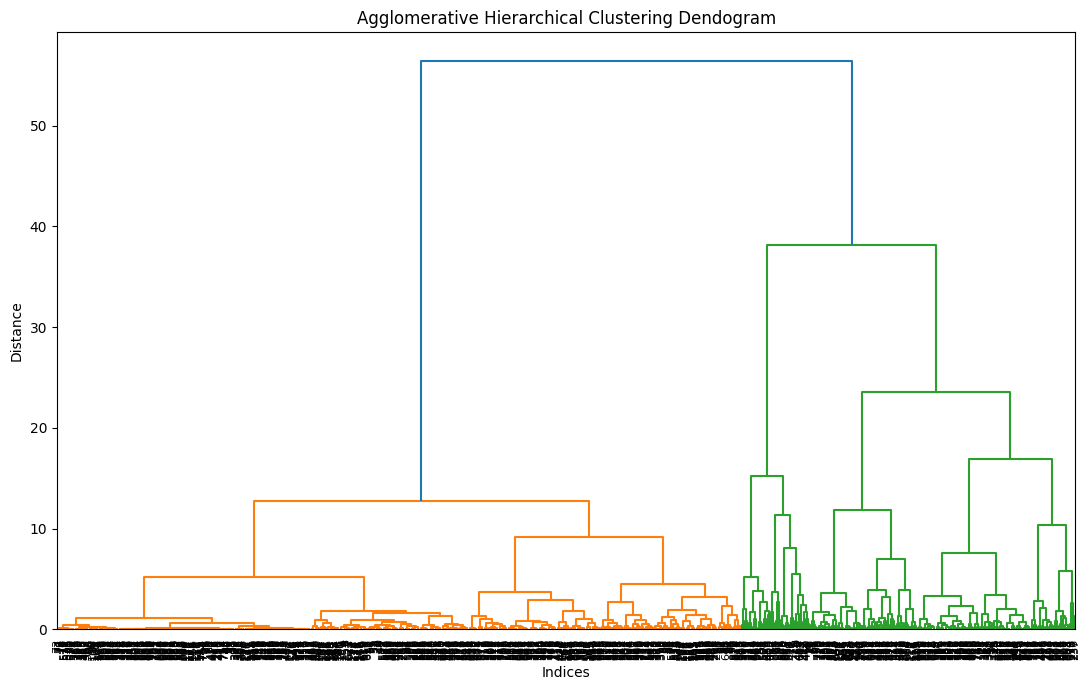

In [182]:
plt.figure(figsize=(11, 7))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Indices')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

### 11. Find the cophenetic correlation coefficient and interpret it.

In [183]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
c, coph_dist = cophenet(Z, pdist(df))
c

0.6727500194101842

### 12. Instantiate clustering method with an optimal number of clusters and 'ward' linkage method.

In [184]:
model = AgglomerativeClustering(4, linkage='ward', metric='euclidean')
model.fit(df)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

### 13. Obtain the cluster labels and add a column containing the cluster number to the original data.

In [185]:
df['clusters'] = model.labels_

In [186]:
df.head(10)

,CO2 Emissions,Energy Usage,GDP,Population Total,clusters
0,-0.516829,-0.592501,-0.557748,-0.485789,1
1,-0.521119,-0.575208,-0.517416,-0.487753,1
2,-0.518170,-0.575208,-0.497116,-0.490003,1
3,-0.531208,-0.584384,-0.480288,-0.492545,1
4,-0.524806,-0.588178,-0.445379,-0.495340,1
5,-0.522359,-0.585001,-0.396850,-0.498255,1
6,-0.530705,-0.584384,-0.415483,-0.501164,1
7,-0.517198,-0.585178,-0.418093,-0.504008,1
8,2.440699,1.941691,0.826908,2.599293,2
9,2.338806,1.966042,1.215545,2.646429,2


### 14. Find the size of each cluster and plot the count plot for the cluster size.

In [187]:
df.groupby('clusters').size()

clusters
0    136
1    589
2     59
3     92
dtype: int64

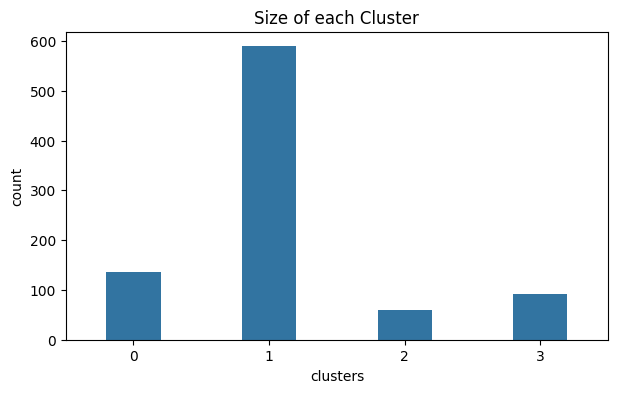

In [188]:
plt.figure(figsize=(7,4))
sns.countplot(df, x='clusters', width=0.4)

plt.title('Size of each Cluster')
plt.show()

### 15. Plot the scatterplot to visualize the clusters using 'CO2 Emissions' and 'Energy Usage'.

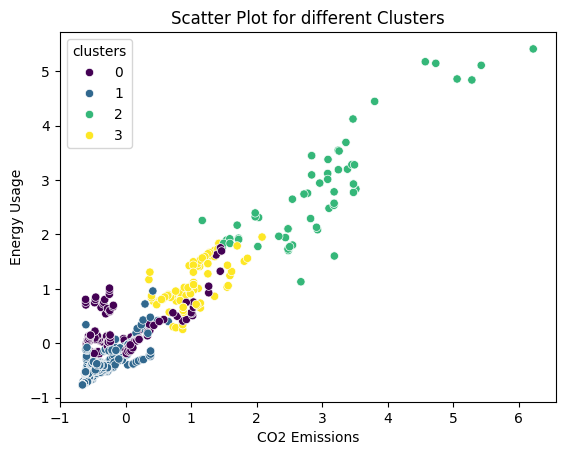

In [189]:
sns.scatterplot(df, x='CO2 Emissions', y='Energy Usage', hue='clusters', palette='viridis')
plt.title('Scatter Plot for different Clusters')
plt.show()

### 16. Obtain the first 10 observations for 1st cluster and find its summary.

In [190]:
df[df['clusters'] == 0].head(10).describe().T

,count,mean,std,min,25%,50%,75%,max
CO2 Emissions,10.0,0.043764,0.222828,-0.356918,-0.114748,0.033424,0.218598,0.358775
Energy Usage,10.0,0.130426,0.168594,-0.087110,0.035356,0.101441,0.235664,0.413517
GDP,10.0,0.334553,0.609614,-0.367747,-0.133350,0.095708,0.912993,1.190018
Population Total,10.0,0.852960,0.332381,0.264722,0.803668,0.934752,1.071728,1.214309
clusters,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 17. Obtain the first 10 observations for the 2nd cluster and find its summary.

In [191]:
df[df['clusters'] == 1].head(10).describe().T

,count,mean,std,min,25%,50%,75%,max
CO2 Emissions,10.0,-0.548077,0.053528,-0.649189,-0.531082,-0.523583,-0.518907,-0.516829
Energy Usage,10.0,-0.617903,0.072180,-0.754495,-0.591420,-0.585090,-0.584384,-0.575208
GDP,10.0,-0.506062,0.097945,-0.666231,-0.547665,-0.488702,-0.424914,-0.396850
Population Total,10.0,-0.553488,0.124790,-0.790080,-0.503297,-0.496798,-0.490639,-0.485789
clusters,10.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Additional: Check which type of linkage would be better for the dataset

In [192]:
df.drop('clusters', axis=1, inplace=True)

In [193]:
linkages = ['single', 'complete', 'average', 'ward']
for i in linkages:
    Z = linkage(df, method=i)
    c, coph_dist = cophenet(Z, pdist(df))
    print(f"Cophenet Index for '{i}' Linkage is {c}")

Cophenet Index for 'single' Linkage is 0.9020366779065557
Cophenet Index for 'complete' Linkage is 0.9133775416779092
Cophenet Index for 'average' Linkage is 0.9100380001521963
Cophenet Index for 'ward' Linkage is 0.6727500194101842


#### 'ward' Linkage resulted in the least Cophenet Index, 'complete' Linkage looks good for this dataset.